In [37]:
import pandas as pd
import numpy as np
import extract_events
import matplotlib.pyplot as plt

In [24]:
pref = "/home/armstrong/Research/new_boxcar_widths/oneCompPDetector/uuss_data"
file_pref = f"{pref}/combined.train.10s.1dup"
hf_file = f"{file_pref}.h5"
meta_file = f"{file_pref}.csv"

In [25]:
df = pd.read_csv(meta_file)

In [6]:
df

,evid,network,station,location,channelz,phase,arrival_time,pick_quality,first_motion,take_off_angle,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
0,60000004,UU,HLJ,1.0,EHZ,P,1.349658e+09,1.00,1,140,...,-111.285500,12.41,1.349658e+09,0.01,d,F,le,0.0,0.0,121008.0
1,60000004,UU,LDJ,1.0,EHZ,P,1.349658e+09,1.00,1,141,...,-111.285500,12.41,1.349658e+09,0.01,d,F,le,1.0,1.0,121008.0
2,60000004,UU,KLJ,1.0,EHZ,P,1.349658e+09,0.75,0,137,...,-111.285500,12.41,1.349658e+09,0.01,d,F,le,2.0,2.0,121008.0
3,60000004,UU,JLU,1.0,HHZ,P,1.349658e+09,1.00,1,132,...,-111.285500,12.41,1.349658e+09,0.01,d,F,le,3.0,3.0,121008.0
4,60000004,UU,DAU,1.0,EHZ,P,1.349658e+09,0.50,0,127,...,-111.285500,12.41,1.349658e+09,0.01,d,F,le,4.0,4.0,121008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362076,50443890,PB,B208,1.0,EHZ,P,1.333009e+09,1.00,0,71,...,-110.954667,11.72,1.333009e+09,2.05,l,F,le,NaN,NaN,NaN
362077,50443890,MB,QLMT,1.0,EHZ,P,1.333009e+09,0.75,0,71,...,-110.954667,11.72,1.333009e+09,2.05,l,F,le,NaN,NaN,NaN
362078,50443890,WY,YMV,1.0,EHZ,P,1.333009e+09,1.00,1,71,...,-110.954667,11.72,1.333009e+09,2.05,l,F,le,NaN,NaN,NaN
362079,50443890,MB,TPMT,1.0,EHZ,P,1.333009e+09,1.00,1,71,...,-110.954667,11.72,1.333009e+09,2.05,l,F,le,NaN,NaN,NaN


In [ ]:
# [(swarm_station_df["receiver_lat"] >= 44.35) & (swarm_station_df["receiver_lat"] <= 45.0) &
#                 (swarm_station_df["receiver_lon"] >= -111.5) & (swarm_station_df["receiver_lon"] <= -110.1)]

In [7]:
# For NGB events - Don't need these for STEAD data
# Remove events within these bounds
lat_min = 44.35
lat_max = 45.0
lon_max = 111.5
lon_min = 110.1
date_min = 130901  # YYMMDD
date_max = 140630  # YYMMDD

bounds = {"lat_min": lat_min,
          "lat_max": lat_max,
          "lon_max": lon_max,
          "lon_min": lon_min,
          "date_min": date_min,
          "date_max": date_max}

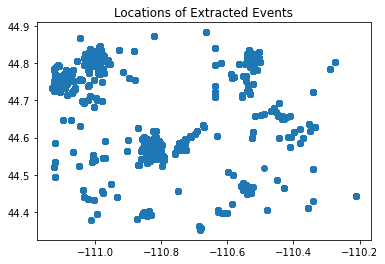

In [10]:
extracted_event_meta, kept_event_meta = extract_events.separate_events(df.copy(), bounds)

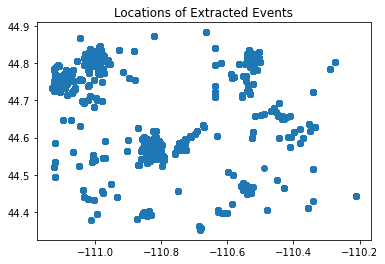

In [38]:
# Filter the metadata to get events within the bounds to extract
evmeta = df.copy().reset_index()

extracted_event_meta = df.loc[
    (evmeta["date"] >= bounds["date_min"]) & (evmeta["date"] <= bounds["date_max"]) & (evmeta["event_lat"] >= bounds["lat_min"])
    & (evmeta["event_lat"] <= bounds["lat_max"]) & (-1 * evmeta["event_lon"] >= bounds["lon_min"]) & (
                -1 * evmeta["event_lon"] <= bounds["lon_max"])]

# plot extracted events to make sure locations make sense
plt.scatter(extracted_event_meta["event_lon"], extracted_event_meta["event_lat"])
plt.title("Locations of Extracted Events")
plt.show()

In [11]:
extracted_event_meta

,evid,network,station,location,channelz,phase,arrival_time,pick_quality,first_motion,take_off_angle,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
16406,60035002,WY,YGC,1.0,EHZ,P,1.377997e+09,1.00,1,158,...,-111.086167,8.41,1.377997e+09,0.29,d,F,le,16406,16406,130901
16407,60035002,WY,YMC,1.0,EHZ,P,1.377997e+09,1.00,1,138,...,-111.086167,8.41,1.377997e+09,0.29,d,F,le,16407,16407,130901
16408,60035002,WY,YHB,1.0,EHZ,P,1.377997e+09,1.00,-1,127,...,-111.086167,8.41,1.377997e+09,0.29,d,F,le,16408,16408,130901
16409,60035002,WY,YHL,1.0,HHZ,P,1.377997e+09,1.00,1,118,...,-111.086167,8.41,1.377997e+09,0.29,d,F,le,16409,16409,130901
16410,60035002,WY,YDC,1.0,EHZ,P,1.377997e+09,0.75,0,110,...,-111.086167,8.41,1.377997e+09,0.29,d,F,le,16410,16410,130901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35153,60074112,PB,B208,1.0,EHZ,P,1.403273e+09,1.00,1,32,...,-110.342333,1.96,1.403273e+09,1.44,d,F,le,35153,35153,140620
35154,60074112,PB,B950,1.0,EHZ,P,1.403273e+09,1.00,1,32,...,-110.342333,1.96,1.403273e+09,1.44,d,F,le,35154,35154,140620
35155,60074112,WY,YML,1.0,EHZ,P,1.403273e+09,0.75,0,32,...,-110.342333,1.96,1.403273e+09,1.44,d,F,le,35155,35155,140620
35156,60074112,WY,YNE,1.0,HHZ,P,1.403273e+09,0.75,0,30,...,-110.342333,1.96,1.403273e+09,1.44,d,F,le,35156,35156,140620


In [ ]:
print("Extracting events...")
# Start processing steps...
extracted_event_meta, kept_event_meta = extract_events.separate_events(meta_df, extract_events_params["bounds"])
print(X.shape, Y.shape)
# Grab all the data not including the extracted events
kept_event_X, kept_event_Y = extract_events.grab_from_h5files(X, Y, kept_event_meta)
# Grab the data for the extracted events
extracted_event_X, extracted_event_Y = extract_events.grab_from_h5files(X, Y, extracted_event_meta)
# Just some sanity checks
assert X.shape[0] - kept_event_X.shape[0] == extracted_event_X.shape[0]
assert Y.shape[0] - kept_event_Y.shape[0] == extracted_event_Y.shape[0]
assert extracted_event_X.shape[0] < kept_event_X.shape[0]
assert extracted_event_Y.shape[0] < kept_event_Y.shape[0]

print("Processing extracted events...")
X_ext, Y_ext, T_ext = self.__augment_data(extracted_event_X[:], extracted_event_Y[:], 1,
                                                target_shrinkage=None, lrand=True, for_python=True,
                                                meta_for_boxcar=extracted_event_meta)

print("Saving extracted event data...")
extract_events.write_h5file(X_ext, Y_ext, self.make_filename(extract_events_params["name"], "h5"), T=T_ext)
extracted_event_meta.to_csv(self.make_filename(extract_events_params["name"], "df.csv"), index=False,
                            float_format="%.7f")